In [1]:
from matplotlib.pyplot import figure
import networkx as nx
from matplotlib.pyplot import figure
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader
import sys 

In [2]:
import numpy as np

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv(r'/Users/hernanadasme/Projects/data_challenges/data_box/exports_21_12_2022/rectype-63.csv')

In [5]:
df.rename({'Source': 'source'}, axis = 1, inplace=True)
df.rename({'Source year': 'source_year'}, axis = 1, inplace=True)
df.rename({'boxer challenging RecordTitle': 'boxer_challenging'}, axis = 1, inplace=True)
df.rename({'boxer challenged RecordTitle': 'boxer_challenged'}, axis = 1, inplace=True)
df.rename({'Location Description': 'location_descp'}, axis = 1, inplace=True)
df.rename({'Status': 'status'}, axis = 1, inplace=True)
df.rename({'Conditions': 'condition'}, axis = 1, inplace=True)
df.rename({'City':'city'}, axis = 1, inplace=True)
df.rename({'Location':'location'}, axis = 1, inplace=True)
df.rename({'Challenge H-ID': 'challenge_id'}, axis = 1, inplace=True)
df.rename({'boxer challenging H-ID': 'challenging_id'}, axis = 1, inplace=True)
df.rename({'boxer challenged H-ID': 'challenged_id'}, axis = 1, inplace=True)
df.rename({'Basis': 'basis'}, axis = 1, inplace=True)

In [6]:
df.head(179)

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,basis,location_descp,city,location
0,972,Araya v. Bolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",780,"Bolli, Carlos",NaN,NaN,NaN,"Manager's business, downtown Los Andes.",Los Andes,POINT(-70.600875 -32.835752)
1,975,Valdes v. Pérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",272,"Pérez, Amador",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.688871 -32.833203)
2,978,Ortiz v. Araya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",882,"Araya, Manuel",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.598582 -32.833016)
3,985,Valdes v. Gallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",827,"Gallardo, Pedro",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.593621 -32.834478)
4,986,Silva v. Iñiguez,Los Sports,1924-02-01,189,"Silva, Carlos",987,"Iñiguez, Mario",accepted,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928)
5,988,Flores v. Farrafino,Los Sports,1924-03-07,302,"Flores, Sara",303,"Farrafino, Clementina",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928)
6,993,Huerta v. Giaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",573,"Giaverini, Oscar",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928)
7,994,Huerta v. Giaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",573,"Giaverini, Oscar",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928)
8,1000,Tapia v. Inostroza,Los Sports,1924-03-07,158,"Tapia, Julio",1001,"Inostroza, Ruperto",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928)
9,1002,Alley v. Salinas,Los Sports,1924-03-07,1003,"Alley, Juan",321,"Salinas, Juan",accepted,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   challenge_id       178 non-null    int64 
 1   rec_Title          178 non-null    object
 2   source             178 non-null    object
 3   source_year        178 non-null    object
 4   challenging_id     178 non-null    int64 
 5   boxer_challenging  178 non-null    object
 6   challenged_id      178 non-null    int64 
 7   boxer_challenged   178 non-null    object
 8   status             39 non-null     object
 9   condition          24 non-null     object
 10  basis              19 non-null     object
 11  location_descp     7 non-null      object
 12  city               140 non-null    object
 13  location           141 non-null    object
dtypes: int64(3), object(11)
memory usage: 19.6+ KB


In [8]:
#change datatype to datetime
df['source_year'] =  pd.to_datetime(df['source_year'], errors= 'ignore')

In [9]:
df['challenged_id'] = df['challenged_id'].fillna(0).astype('int64')

In [10]:
nodes = pd.read_csv(r'/Users/hernanadasme/Projects/data_challenges/data_box/exports_21_12_2022/rectype-10.csv')

In [11]:
nodes.head()

,Boxer H-ID,rec_Title
0,882,"Araya, Manuel"
1,780,"Bolli, Carlos"
2,833,"Valdes, Mario"
3,272,"Pérez, Amador"
4,976,"Ortiz, Rafael"


In [12]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Boxer H-ID  259 non-null    int64 
 1   rec_Title   259 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [13]:
nodes.rename({'Boxer H-ID': 'id'}, axis = 1, inplace=True)
nodes.rename({'rec_Title': 'name'}, axis = 1, inplace=True)

In [14]:
gephi = df.copy()
#gephi.info()

In [15]:
#creating the column weight
df['weight'] = df.groupby(['challenging_id', 'challenged_id'])['challenging_id'].transform('size')

In [16]:
df.head(179)

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,basis,location_descp,city,location,weight
0,972,Araya v. Bolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",780,"Bolli, Carlos",NaN,NaN,NaN,"Manager's business, downtown Los Andes.",Los Andes,POINT(-70.600875 -32.835752),1
1,975,Valdes v. Pérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",272,"Pérez, Amador",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.688871 -32.833203),2
2,978,Ortiz v. Araya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",882,"Araya, Manuel",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.598582 -32.833016),2
3,985,Valdes v. Gallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",827,"Gallardo, Pedro",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.593621 -32.834478),2
4,986,Silva v. Iñiguez,Los Sports,1924-02-01,189,"Silva, Carlos",987,"Iñiguez, Mario",accepted,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),1
5,988,Flores v. Farrafino,Los Sports,1924-03-07,302,"Flores, Sara",303,"Farrafino, Clementina",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),1
6,993,Huerta v. Giaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",573,"Giaverini, Oscar",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),2
7,994,Huerta v. Giaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",573,"Giaverini, Oscar",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),2
8,1000,Tapia v. Inostroza,Los Sports,1924-03-07,158,"Tapia, Julio",1001,"Inostroza, Ruperto",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),1
9,1002,Alley v. Salinas,Los Sports,1924-03-07,1003,"Alley, Juan",321,"Salinas, Juan",accepted,NaN,NaN,NaN,NaN,NaN,1


In [17]:
df.iat[43,7]= 'Contre., H.'

In [18]:
df.iat[150,5]

'Lemus, Juan Segundo'

In [19]:
df.iat[155,7]

'Devia, Francisco'

In [20]:
df.iat[143,7]

'Jimenez, Evaristo'

In [21]:
df.iat[86,7]

'Castellon, Manuel'

In [22]:
df.iat[106,7]

'Moreno, Germán'

In [23]:
df.iat[35,7]

'Inostroza, Lupercio'

In [24]:
df.iat[127,7]

'Madrid, Hector E.'

In [25]:
df.iat[100,7]

'Roberts, Charles'

In [26]:
df.iat[5,7]

'Farrafino, Clementina'

In [27]:
df.iat[47,7]

'Valenzuela, Oscar'

In [28]:
df.iat[150,5] = 'Lemus, Juan S.'

In [29]:
df.iat[155,7] = 'Devia, Francis'

In [30]:
df.iat[143,7] = 'Jimenez, Ev.'

In [31]:
df.iat[86,7] = 'Castellon, M.'

In [32]:
df.iat[35,7] = 'Inostroza, L.'

In [33]:
df.iat[127,7] = 'Madrid, Hector'

In [34]:
df.iat[106,7] = 'Moreno, G.'

In [35]:
df.iat[5,7] = 'Farrafino, Cleme'

In [36]:
df.iat[47,7] = 'Valenzuela, Os.'

In [37]:
df.iat[100,7] = 'Roberts, Charly'

In [78]:
df.to_csv('challenges_cleaned.csv', index = False, encoding = 'utf-8-sig')

In [38]:
#option D which mixes the from_pandas_edgelist and the adding metadata with a loop
CH = nx.from_pandas_edgelist(df, 'challenging_id', 'challenged_id', edge_attr='weight')
CH.add_nodes_from(df['challenging_id'], bipartite = 'challenger')
CH.add_nodes_from(df['challenged_id'], bipartite = 'challenged')
for box, row in df.iterrows():
    CH.nodes[row['challenging_id']]['name'] = row['boxer_challenging']
    CH.nodes[row['challenged_id']]['name'] = row['boxer_challenged']
    CH.nodes[row['challenging_id']]['source'] = row['source']
    CH.nodes[row['challenging_id']]['date'] = row['source_year']
for r, d in df.iterrows():
    CH.add_edge(d['challenging_id'], d['challenged_id'], date = d['source_year'], challenge = d['rec_Title'])    
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(CH)
for n in CH.nodes():
    CH.nodes[n]['centrality'] = dcs[n]
len(CH.nodes), len(CH.edges)

(259, 171)

In [39]:
CH.nodes(data=True)

NodeDataView({882: {'bipartite': 'challenged', 'name': 'Araya, Manuel', 'source': 'Semanario La Prensa. Los Andes', 'date': Timestamp('1928-04-05 00:00:00'), 'centrality': 0.007751937984496124}, 780: {'bipartite': 'challenged', 'name': 'Bolli, Carlos', 'centrality': 0.003875968992248062}, 833: {'bipartite': 'challenged', 'name': 'Valdes, Mario', 'source': 'Semanario La Prensa. Los Andes', 'date': Timestamp('1928-01-01 00:00:00'), 'centrality': 0.015503875968992248}, 272: {'bipartite': 'challenged', 'name': 'Pérez, Amador', 'centrality': 0.003875968992248062}, 976: {'bipartite': 'challenger', 'name': 'Ortiz, Rafael', 'source': 'Semanario La Prensa. Los Andes', 'date': Timestamp('1928-04-08 00:00:00'), 'centrality': 0.003875968992248062}, 827: {'bipartite': 'challenged', 'name': 'Gallardo, Pedro', 'centrality': 0.007751937984496124}, 189: {'bipartite': 'challenger', 'name': 'Silva, Carlos', 'source': 'Los Sports', 'date': Timestamp('1924-02-01 00:00:00'), 'centrality': 0.0038759689922480

In [40]:
CH.edges(data=True)

EdgeDataView([(882, 780, {'weight': 1, 'date': Timestamp('1928-04-05 00:00:00'), 'challenge': 'Araya v. Bolli'}), (882, 976, {'weight': 2, 'date': Timestamp('1928-04-08 00:00:00'), 'challenge': 'Ortiz v. Araya'}), (833, 272, {'weight': 2, 'date': Timestamp('1928-04-08 00:00:00'), 'challenge': 'Valdes v. Pérez'}), (833, 827, {'weight': 2, 'date': Timestamp('1928-01-01 00:00:00'), 'challenge': 'Valdes v. Gallardo'}), (833, 1284, {'weight': 1, 'date': Timestamp('1925-07-10 00:00:00'), 'challenge': 'Duque v. Valdes'}), (833, 836, {'weight': 1, 'date': Timestamp('1928-02-26 00:00:00'), 'challenge': 'Baeza v. Valdes'}), (827, 1367, {'weight': 1, 'date': Timestamp('1922-09-11 00:00:00'), 'challenge': 'Parraguez v. Gallardo'}), (189, 987, {'weight': 1, 'date': Timestamp('1924-02-01 00:00:00'), 'challenge': 'Silva v. Iñiguez'}), (302, 303, {'weight': 1, 'date': Timestamp('1924-03-07 00:00:00'), 'challenge': 'Flores v. Farrafino'}), (891, 573, {'weight': 2, 'date': Timestamp('1924-02-01 00:00:00

In [41]:
challengers = [node for node in CH.nodes() if node in df.challenging_id.unique()]
challenged = [node for node in CH.nodes() if node in df.challenged_id.unique()]
print(len(challengers))
print(len(challenged))

131
148


In [42]:
# 2. Create a layout for our nodes 
pos = nx.spring_layout(CH, k =0.5)
pos["639"] = (0.005,0.005)

In [43]:
# 2. The metrics: size according to the degree centrality
size = [CH.degree(node) * 2500 for node in CH.nodes() if node in df.challenging_id.unique()]

In [44]:
size_ed = [CH.degree(node) * 1800 for node in CH.nodes() if node in df.challenged_id.unique()]

In [45]:
edge_labels = nx.get_edge_attributes(CH, 'challenge')
node_labels = nx.get_node_attributes(CH, 'name')

In [46]:
print(edge_labels)

{(882, 780): 'Araya v. Bolli', (882, 976): 'Ortiz v. Araya', (833, 272): 'Valdes v. Pérez', (833, 827): 'Valdes v. Gallardo', (833, 1284): 'Duque v. Valdes', (833, 836): 'Baeza v. Valdes', (827, 1367): 'Parraguez v. Gallardo', (189, 987): 'Silva v. Iñiguez', (302, 303): 'Flores v. Farrafino', (891, 573): 'Huerta v. Giaverini', (573, 143): 'Caldera v. Giaverini', (158, 1001): 'Tapia v. Inostroza', (1003, 321): 'Alley v. Salinas', (647, 423): 'Olguín v. Valdenegro', (647, 1006): 'Olguín v. Henriquez', (647, 1008): 'Olguín v. Leiva', (647, 1314): 'Olguín v. Sedan', (332, 1010): 'Acosta v. Molina', (332, 1012): 'Acosta v. Parra', (1010, 1197): 'Vásquez v. Molina', (1010, 1249): 'Laverry v. Molina', (1012, 1261): 'Parra v. Molina', (502, 1014): 'Rios v. Arratia', (143, 572): 'Caldera v. Anguita', (77, 146): 'Guerrero v. Lasseube', (146, 939): 'Salinas v. Lasseube', (146, 1255): 'Lucero v. Lasseube', (639, 1021): 'Gonzalez v. Suarez', (639, 735): 'Gonzalez v. Correa', (639, 1024): 'Gonzalez 

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


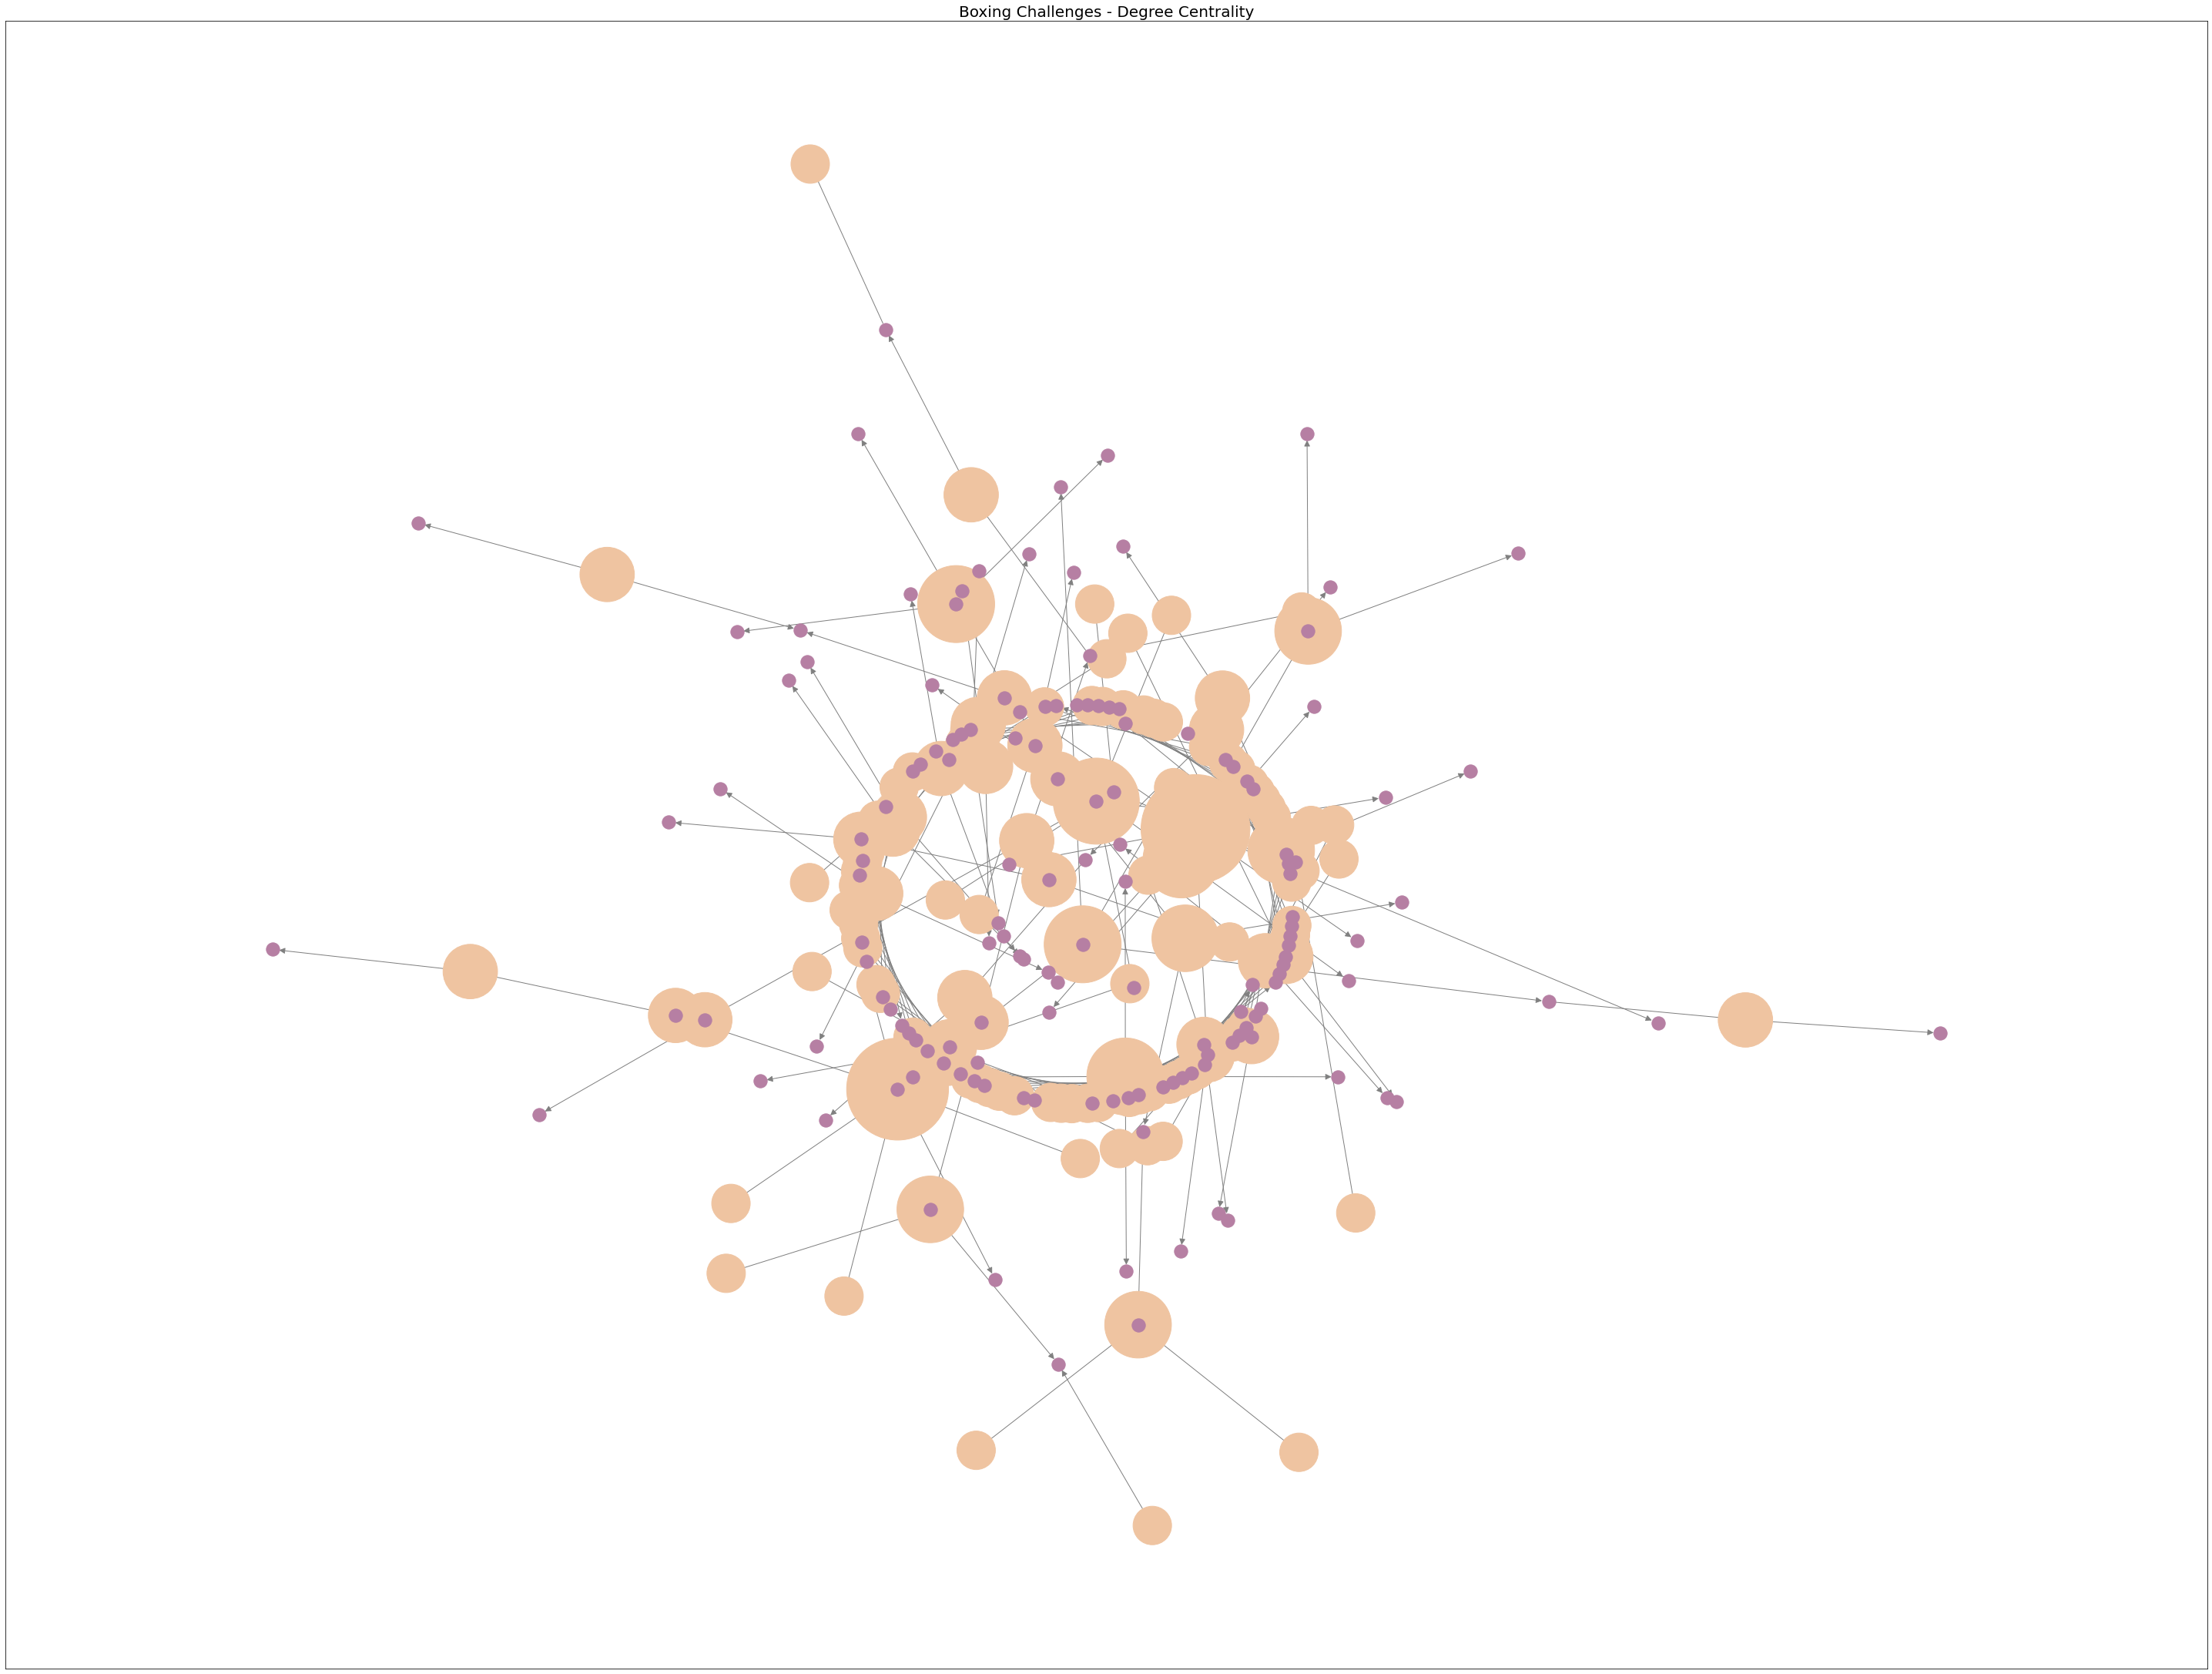

In [47]:
fig, ax = plt.subplots(figsize=(40, 30))
# 2. Create a layout for our nodes 
pos = nx.kamada_kawai_layout(CH)
#pos["639"] = (0.005,0.005)
nx.draw_networkx_edges(CH, pos, edge_color='grey',arrows=True, arrowsize=16)
nx.draw_networkx_nodes(CH, pos, nodelist=challengers, node_size=size, node_color ='#EFC4A1')
nx.draw_networkx_nodes(CH, pos, nodelist=challenged, node_size=300, node_color ='#B67FA3')
challengers_dict = dict(zip(challengers, challengers))
#nx.draw_networkx_labels(CH, pos, labels = node_labels, font_size=14)
#nx.draw_networkx_labels(CH, pos, labels=challengers_dict, font_size=30)
#nx.draw_networkx_labels(CH, pos, labels=challenged_dict)
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("on")
plt.title('Boxing Challenges - Degree Centrality', fontsize=20)
#fig5 = plt.gcf()
#fig5.savefig("/Users/hernanadasme/Documents/data_challenges/graph.jpg", dpi=600) 
plt.show()

In [48]:
weight = nx.get_edge_attributes(CH, 'weight')

In [1]:
fig, ax = plt.subplots(figsize=(50, 35), dpi=100)
# 2. Create a layout for our nodes 
pos = nx.nx_agraph.graphviz_layout(CH, prog="twopi")
#pos["639"] = (0.005,0.005)
nx.draw_networkx_edges(CH, pos, edge_color='lightblue', arrows=True, arrowstyle ='-', arrowsize=65, width=3.0)
nx.draw_networkx_nodes(CH, pos, nodelist=challengers, node_size=size, node_color ='#EFC4A1')
nx.draw_networkx_nodes(CH, pos, nodelist=challenged, node_size=size_ed, node_color ='#E18CC4')
challengers_dict = dict(zip(challengers, challengers))
nx.draw_networkx_labels(CH, pos, labels = node_labels, font_size=14.1)
#nx.draw_networkx_edge_labels(CH, pos, edge_labels = edge_labels, font_size= 20)
#nx.draw_networkx_labels(CH, pos, labels=challenged_dict)
#ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.title('Boxing Challenges - Degree Centrality', fontsize=60)
fig = plt.gcf()
#fig.savefig('figure_9.pdf', dpi=100, format='pdf', bbox_inches='tight') 
fig.savefig('graph_centrality_01.svg', dpi=1200, format='svg', bbox_inches='tight') 
#fig.savefig('figure_9.png', dpi=100, format='png', bbox_inches='tight')
plt.show()

NameError: name 'plt' is not defined

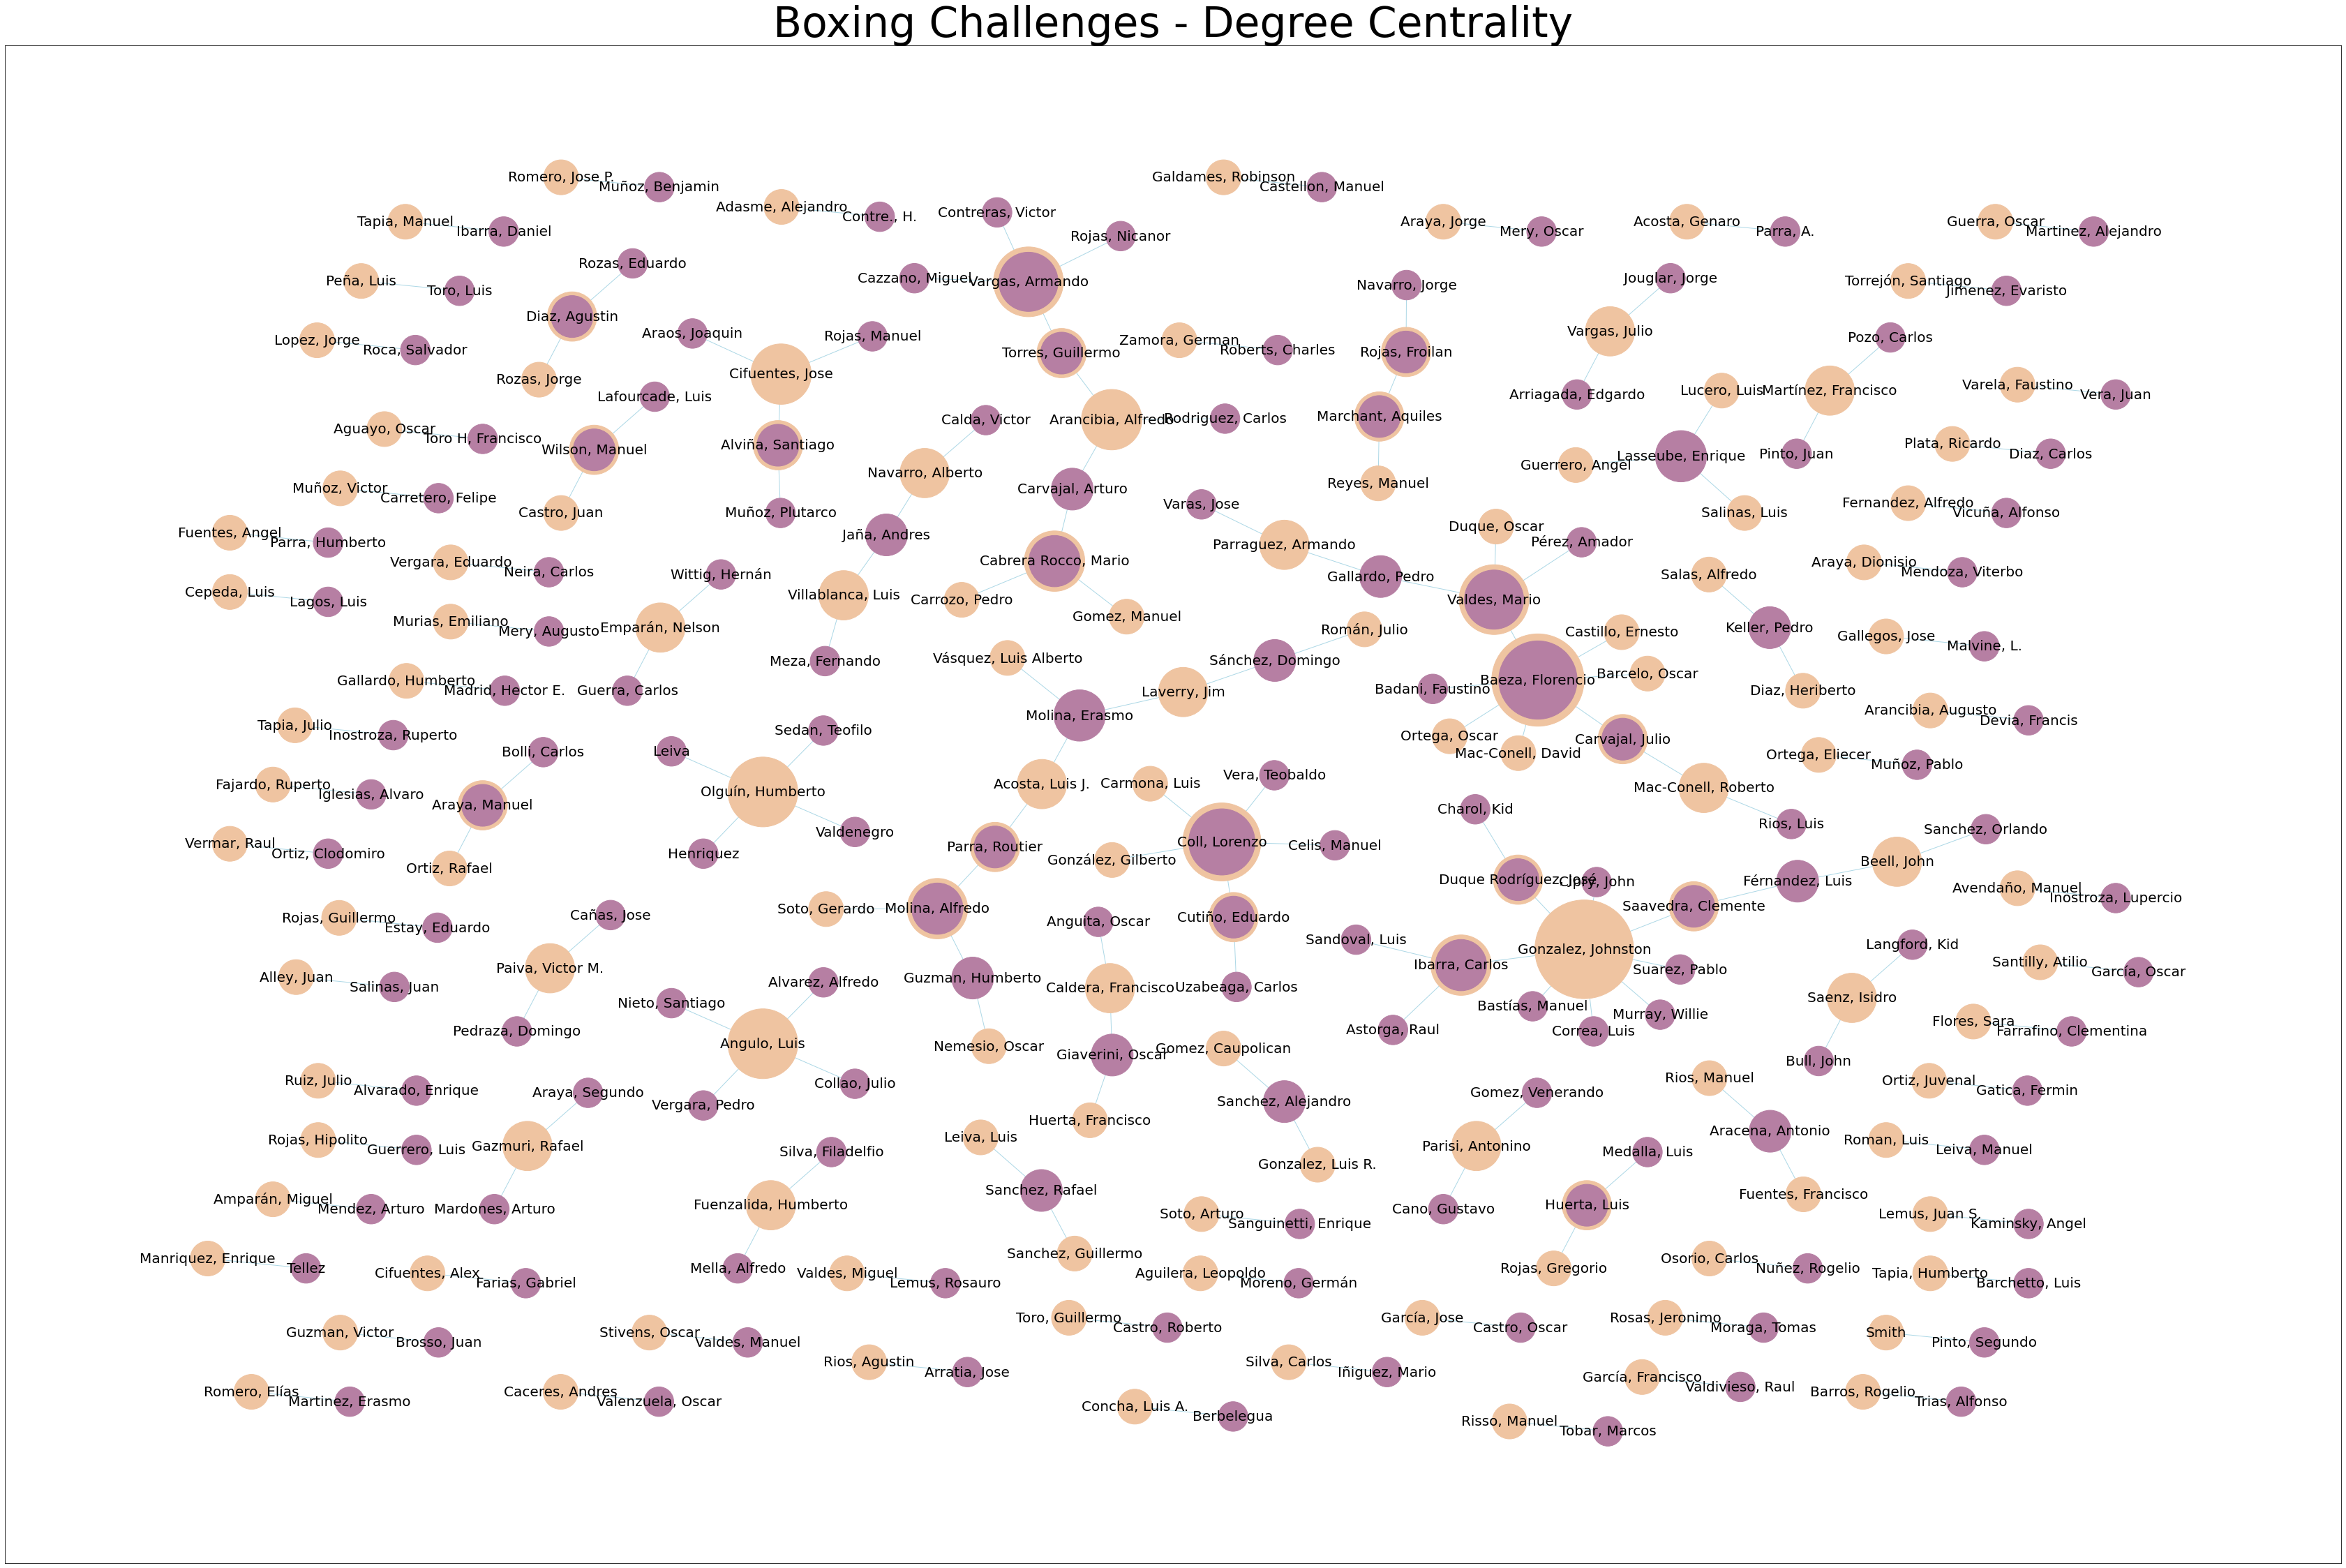

In [282]:
fig, ax = plt.subplots(figsize=(60, 40))
# 2. Create a layout for our nodes 
pos = nx.nx_agraph.graphviz_layout(CH, prog="neato", root=0)
#pos["639"] = (0.005,0.005)
nx.draw_networkx_edges(CH, pos, edge_color='lightblue',arrows=True, arrowstyle ='-', arrowsize=70)
nx.draw_networkx_nodes(CH, pos, nodelist=challengers, node_size=size, node_color ='#EFC4A1')
nx.draw_networkx_nodes(CH, pos, nodelist=challenged, node_size=size_ed, node_color ='#B67FA3')
challengers_dict = dict(zip(challengers, challengers))
nx.draw_networkx_labels(CH, pos, labels = node_labels, font_size=20)
#nx.draw_networkx_labels(CH, pos, labels=challengers_dict, font_size=30)
#nx.draw_networkx_labels(CH, pos, labels=challenged_dict)
#ax.margins(0.1, 0.05)
#fig.tight_layout()
#plt.axis("on")
plt.title('Boxing Challenges - Degree Centrality', fontsize=60)
#fig5 = plt.gcf()
#fig5.savefig("/Users/hernanadasme/Documents/data_challenges/graph.jpg", dpi=600) 
plt.show()

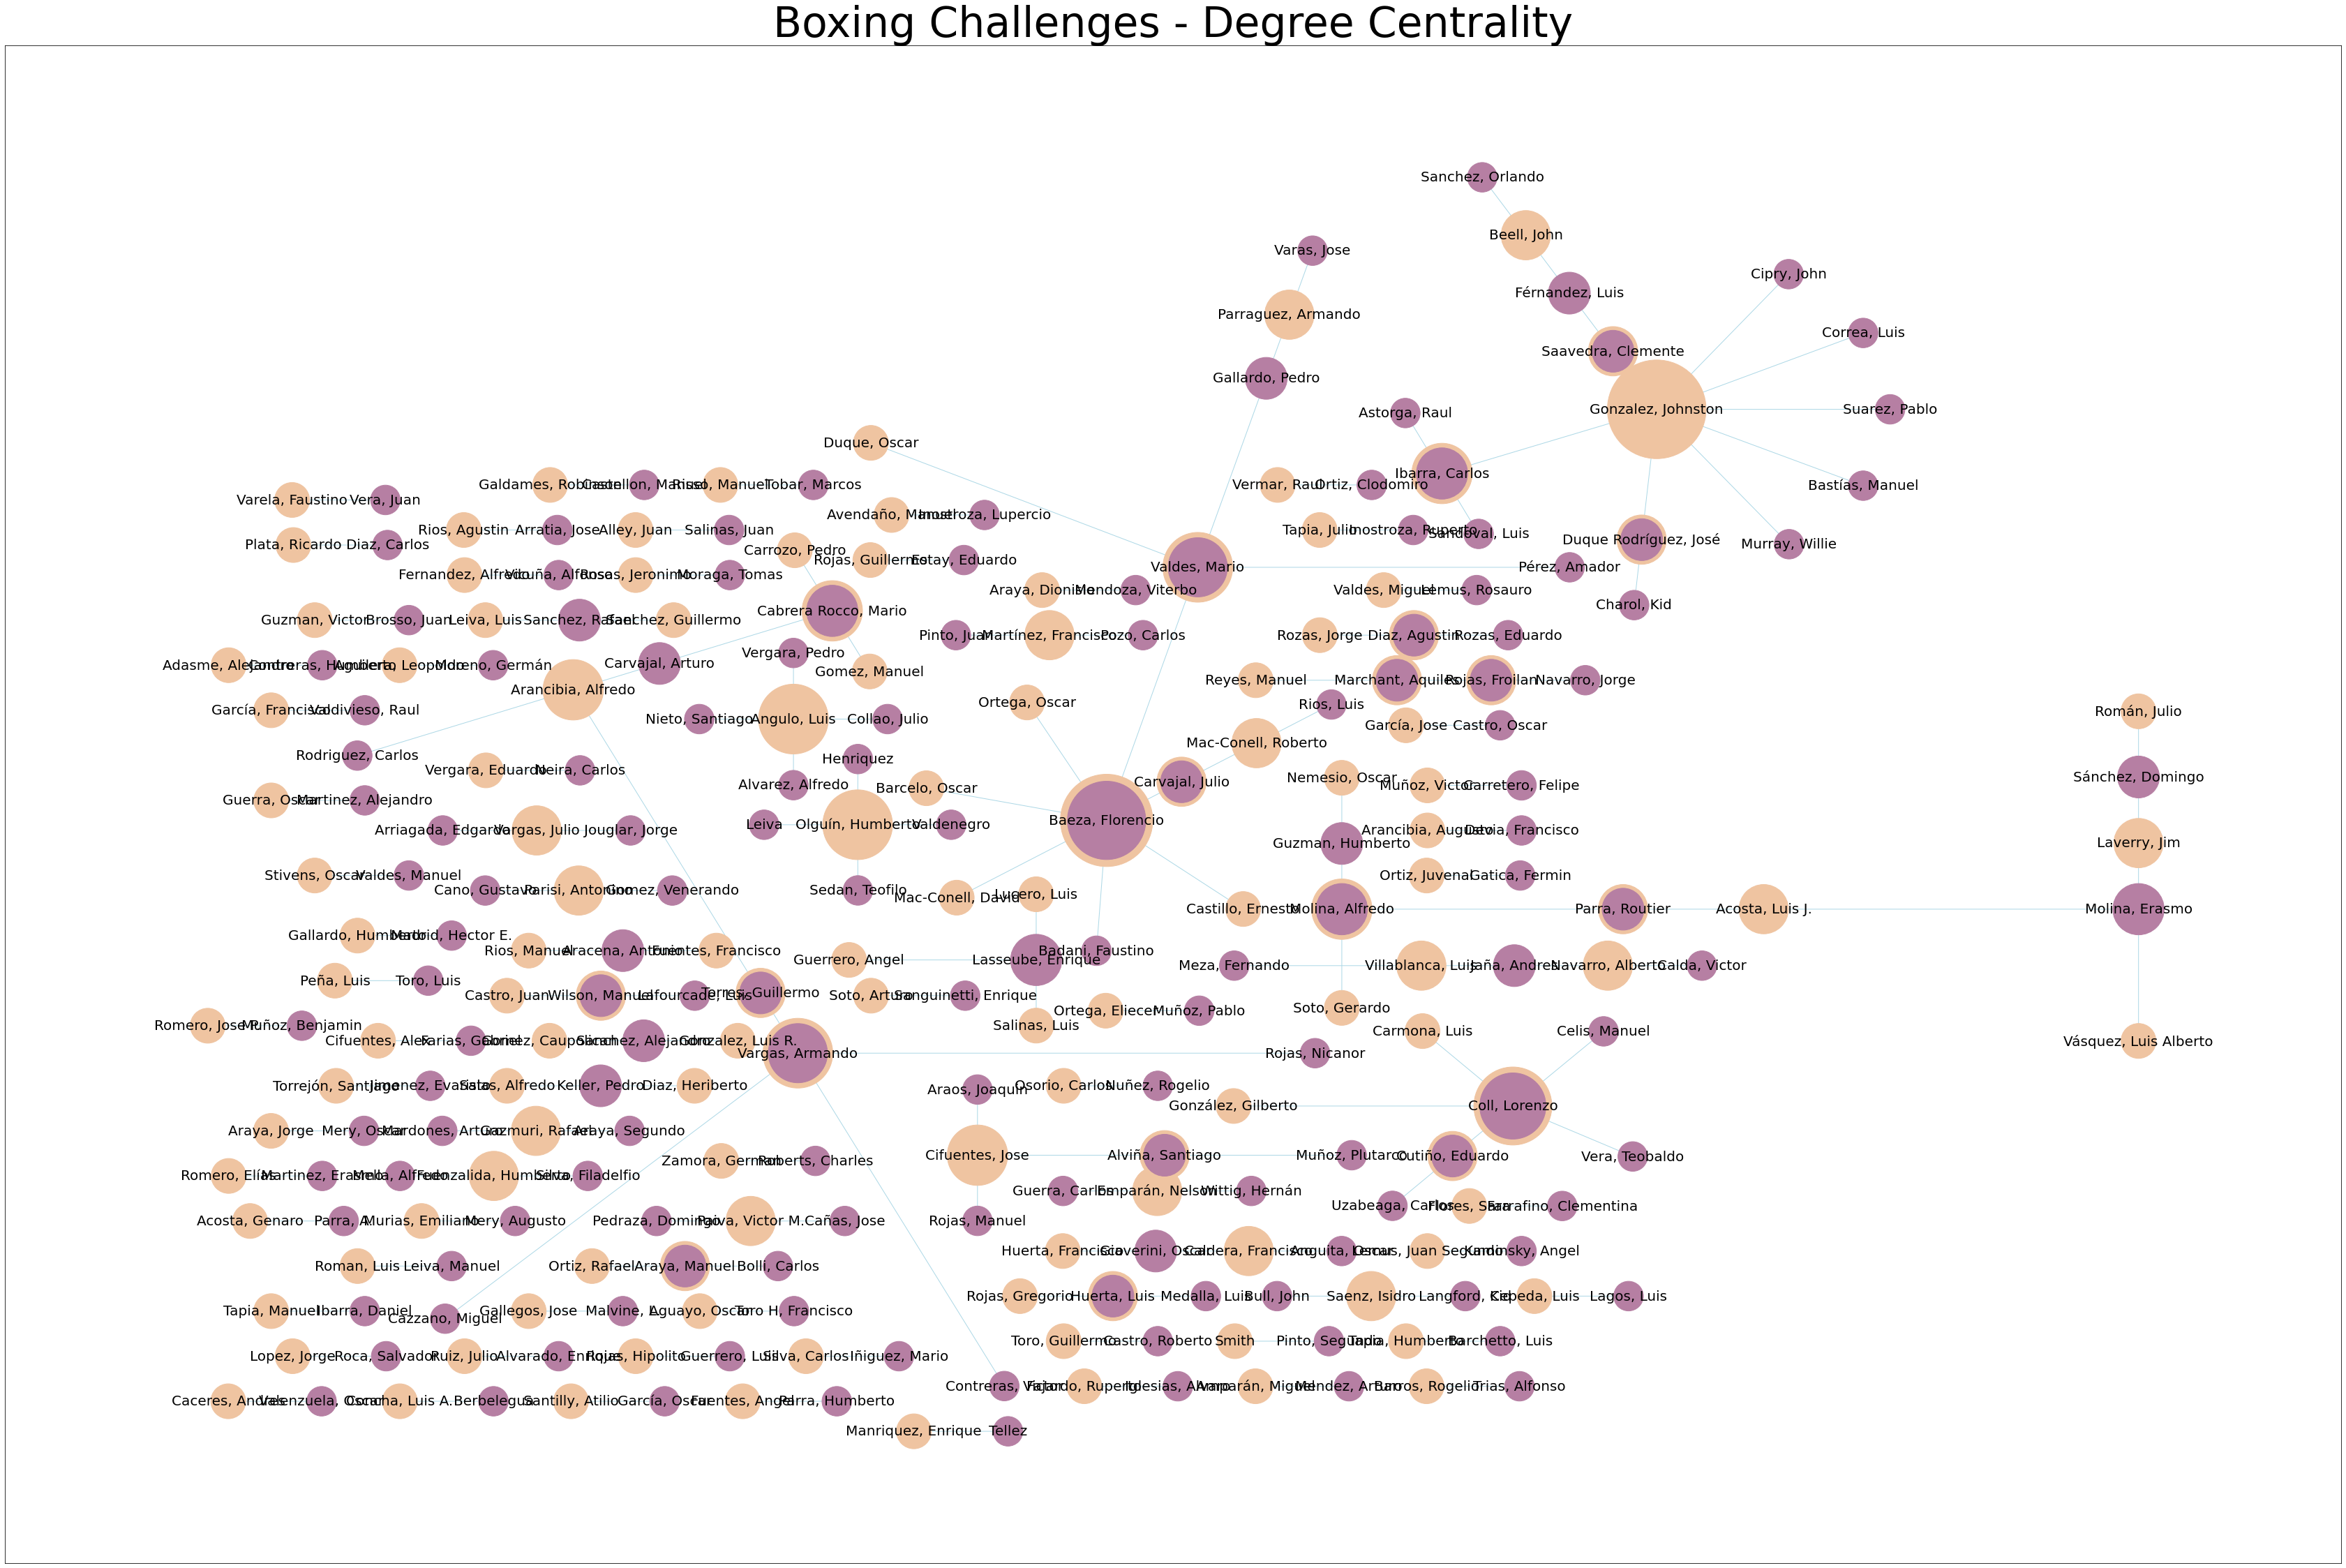

In [214]:
fig, ax = plt.subplots(figsize=(60, 40))
# 2. Create a layout for our nodes 
pos = nx.nx_agraph.graphviz_layout(CH, prog="circo", root=0)
#pos["639"] = (0.005,0.005)
nx.draw_networkx_edges(CH, pos, edge_color='lightblue',arrows=True, arrowstyle ='-', arrowsize=70)
nx.draw_networkx_nodes(CH, pos, nodelist=challengers, node_size=size, node_color ='#EFC4A1')
nx.draw_networkx_nodes(CH, pos, nodelist=challenged, node_size=size_ed, node_color ='#B67FA3')
challengers_dict = dict(zip(challengers, challengers))
nx.draw_networkx_labels(CH, pos, labels = node_labels, font_size=20)
#nx.draw_networkx_labels(CH, pos, labels=challengers_dict, font_size=30)
#nx.draw_networkx_labels(CH, pos, labels=challenged_dict)
#ax.margins(0.1, 0.05)
#fig.tight_layout()
#plt.axis("on")
plt.title('Boxing Challenges - Degree Centrality', fontsize=60)
#fig5 = plt.gcf()
#fig5.savefig("/Users/hernanadasme/Documents/data_challenges/graph.jpg", dpi=600) 
plt.show()

Program circo’ is not one of: neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten.